# Training Data Generation

Problem Space:
    
There are 92K tweets across 5 years 2018 to 2022 with anchor tagged username @CUBoulder. Labelling these preprocessed tweets into following intents, using RevChatGPT tool.

Inventory:

"Reverse Engineered ChatGPT API by OpenAI. Extensible for chatbots etc."
- virtualharby - Memes for emotional support
- rawandahmad698 - Reverse engineering Auth0
- FlorianREGAZ - TLS client
- PyRo1121 - Linting
- Harry-Jing - Async support
- Ukenn2112 - Documentation

https://github.com/acheong08/ChatGPT

In [1]:
import os
import pandas as pd
import sys
import json
from revChatGPT.ChatGPT import Chatbot

In [2]:
token = """eyJhbGciOiJkaXIiLCJlbmMiOiJBMjU2R0NNIn0..cSX_GT-IkjbR0FR5.nyKj02VKFr2F4BNy5nmug1RS3zX9fblliEnBImPRlnHgWy-H5sk1oaZ77YbMRBXUQ5NObiERoWegqOQriVPH5XD1aKX6-9kQbAoDE6dhNw9bHpmmepkHVslnNal0oLs9UimDyG0mvZTAe1DVJjBXPyPHrpewja1657Z8LUDuO5eKlqf1OKWzwYZsqI0utSc3sJ9Dh6JyoAGQ7CqzXtvgyUM0u4iarIdSiKz9nFu_gTAleIVO6PW5rKzpTlxwCIdVTI1E_NIFF_8xF0oZRf-0CJEug9mIjQv1iWqeE5D40e9Dv9s_6yrxACktmrBsz2741ykpgmQaB_HV4lJ-6dnKnhN77LfjVhdBYfEIEKH1tQ8bSIERKO5H5vkOgNiehMvnhE2vOWWaQl0I-X6VB28e1EB1gXuQLZQG3UtOqTeVgUBiK0UGGsluCnI2KdT_AoI99rVGaswj6pdyq7IvOO6Nx3CkkXjVUaqUt2-JgyRmn2BYndF-mkKjm2qzknHC8cFsRrSZFg-WYAKj5m2vLSdz6Ibz5Sg5pbHJZZKgRnDl2kQFelenscB2vLCBEbqA9eLw1zr9weDLTbOrY3_Zeig4iC7AXkuua0WkT_2EExVGNyUK-0MgENaujGZ8NdEtQFXDxUW-xExPpVyrjqYdcsuUznibGp2PQcAiC9Oaz49AOzL3Pfk792eGtQVdW5H0kBtmjkWbSUWomPbTEO6cEoutqBOCyWzBlJB75_84aovYHzQbelKoNMqPV7zLB7JWjYM4ei3YWqE7bw_YV_T2f9-fCZU4Mpl2-L-tjVN2qjK6PoRLNv57yQunLyfwRz2EIZLzm_nzO2-jDvwmkph5btjVqzZy3fmTVs4c35Z3S0gNvt8QZ76Zzm0uJ4_12_s8-oV7OZzDqv14CZv2PNqKOhGYB1CjT5mS82H8bVst9Q4JU1q86UmtUIfjph7zYoDWIGGbryH0ZA7Q6SUpF2-7P2Fea0BfweYL0XXQCpoxn5G3wKtDdQS5YH1gJtXFCZR91dyhzcuC1F_KUdzCK18ckwc9tzOw7GQyFYVucTFDtKS_oneqV1c83wCPFFg0WsWWCQQ99EPrGNq9UxO2g79FJSHBmoYb9QeI0--ZrmkTLfTEniiDt3KfoWgyavRsmqusaegiD9DHH4i5DPZ0chmqpnTEFxh_06a7uOjPC556S3E-k_ioD_6s0TdMFz_ueQuObsdWSsRCpiW-L8t-YB2eCbP1NDkvPiIa3Ih6gJ8QY2KwxJnSL9VKzyhgxk2Xdd7PDcgKpXklPYtF2oEDnpbKBbwZc4UlmnOs3jrYq_IVfNWdO7sHNkfwgNIW63yQ7BQtjIqpEidH5XMy6j96R0M27qcLYl0kDkDVgAzyBapKfx9OTcEXgKLj4Bytpp8Rlf39YVcb701QzlVhYcvZK-HjwxfFbyL53kHM9B9108U5YkpIDYt3O_MbtsctkfE4DYU2oJ-1zXi1Vxqqz37LcrNKKUcynBfIjiFolt3QFDPe81WAzg9Lhho89NS3W-6iUYm8fhzuVebcE_FkvPeiXbNng3Mw4Kql4Mps9sQlrATmGZcLdQRCfSkzvpgR4fhOxkj4O_q0uLeYdWXYJED2CmpIch9E2ydm0Obr--m06bSrtt5dz4-iaN68I3OgYh57ga1lf-D3j9dHOPgspCsJ08nutr2pgJgFmReCLzISBE9Ff-fPI6tgPR3Pd9ikpyZsH2M-6mesngTllyoL5xDDuWgYmQ-5w7hjPCDiCzmWtJSGHd9KqaY3zTFTHiqsHz9xks76WYA1W7snjwb1L9XQ0sBFgNujlqjNi7zTzLBCDuMVWj_CFh6ks6iCUkQiGd9XQWpgIvrVI3yJtkIZKtHKi_r8kWy1txyDGYJNXIXRlcEzV8_lOPfQTLVxne0Ijj-srS8_vZzefSXsBvxdObF_HqiHdkIAJ7V4lHUi-T7fF4GlOZVIaqIBHTERiHjMK7wG1e_w7FSUEiHyx4d05li5iOktP_VO57PfKU_aiu3kgvNPFbc9HF43Tdq5xyjAlgMzQfPM5iFqgJbWu7sPcEmQVCCZCjIr3egmaREambLBfFleXqHgASFTXtcgAF5mX8xtmH98bzF6LIXFJrIX4kCidzSoou_bVeGgLHqP6FnS-sDroiuqabZAn0PW-cnaOYYgQam23JepK5Sk33Ez4ob5J6utyJow2pl_zOaVHvuQKNy3hIpO6ynbY9-Sy2EvoRLcEXjIMeJqSYhE0hWyVlBQHhQ0Bo9IjibrF9UUQp7ZSteQttAyaVHQvJwb1k4pCW4bD70h83-ptgp0LJ29qbliYdr13Cb2uJaJxEvlV4Di1Bx2Dbzao4-G59fMjcOuBXwNdnyXP2bvopY24-8tuMmDzUtb7uq9MOzmpy3cAMPFqXBa6lDM4fKVaXFzOpl4-9PtVaEsf0_qt9dDjmI0lAsruWhl3u4VONqTkamkUY5oKCxzN-7TvNR4Zr7laEzTLtSMetv_sdUEnKzvQrjDL0CruGmgU1bqMSz1BXCBdEyrE0WxXOswv991z3E0dPrGDy4SOBqCEUq-Phz6GXxH6OiOpRBEzMVsQ8XipH5rKf-fR_MM2rvLSOZ0gbzSHD-um8QaVfJV3elLVIAPwkyLGykTsVZ_-s8hw6tQ-NiMhwMHWV709YSYTD4snprl5_Qpu_JT5POtlc2g5lE5mAYPBsQqpRkhMh2eIAybokjigj2C1skdAM8EUssvr0oDAhbDDGAd3yykxMhM8e368IXWMdXN8eg9QCvs.49maveAZzO8AAQFjFuaw8g"""

In [3]:
chatbot = Chatbot(
    {"session_token": token}, 
    conversation_id=None, 
    parent_id=None)

Spawning browser...
Browser spawned.
Found Cloudflare Cookie!


In [5]:
prompt = """Generate 50 FAQs using the keyword "{}" for intent "suggest similar courses".""".format("COURSE_NAME")

In [7]:
# You can specify custom conversation and parent ids. Otherwise it uses the saved conversation (yes. conversations are automatically saved)

response = chatbot.ask(prompt, 
                       conversation_id=None, 
                       parent_id=None) 


store_response = response
# {
#   "message": message,
#   "conversation_id": self.conversation_id,
#   "parent_id": self.parent_id,
# }

In [8]:
import json
print(json.dumps(store_response, indent=4))

{
    "message": "1. What are some similar courses to COURSE_NAME?\n2. Are there any alternative courses to COURSE_NAME?\n3. Can you suggest any courses that are similar to COURSE_NAME?\n4. I'm interested in COURSE_NAME, what other courses should I consider?\n5. Can you recommend any other courses that are like COURSE_NAME?\n6. Are there any related courses to COURSE_NAME that I should check out?\n7. Can you suggest any complementary courses to COURSE_NAME?\n8. What are some other courses in the same field as COURSE_NAME?\n9. Are there any other courses that would be a good fit for someone who's interested in COURSE_NAME?\n10. Can you recommend any courses that have a similar curriculum to COURSE_NAME?\n11. What are some other courses that cover similar material as COURSE_NAME?\n12. Are there any other courses that have a similar focus as COURSE_NAME?\n13. Can you suggest any other classes that are similar to COURSE_NAME?\n14. Are there any other programs that are similar to COURSE_NAM

In [14]:
store_response['message'].split("\n")

['1. What are some similar courses to COURSE_NAME?',
 '2. Are there any alternative courses to COURSE_NAME?',
 '3. Can you suggest any courses that are similar to COURSE_NAME?',
 "4. I'm interested in COURSE_NAME, what other courses should I consider?",
 '5. Can you recommend any other courses that are like COURSE_NAME?',
 '6. Are there any related courses to COURSE_NAME that I should check out?',
 '7. Can you suggest any complementary courses to COURSE_NAME?',
 '8. What are some other courses in the same field as COURSE_NAME?',
 "9. Are there any other courses that would be a good fit for someone who's interested in COURSE_NAME?",
 '10. Can you recommend any courses that have a similar curriculum to COURSE_NAME?',
 '11. What are some other courses that cover similar material as COURSE_NAME?',
 '12. Are there any other courses that have a similar focus as COURSE_NAME?',
 '13. Can you suggest any other classes that are similar to COURSE_NAME?',
 '14. Are there any other programs that ar

In [16]:
# Data science
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")

# Deep Learning 
import tensorflow as tf
print(f"Tensorflow: {tf.__version__}")
from tensorflow import keras
print(f"Keras: {keras.__version__}")
import sklearn
print(f"Sklearn: {sklearn.__version__}")

# NER
import spacy
print(f'spaCy: {spacy.__version__}')
from spacy import displacy
import random
from spacy.matcher import PhraseMatcher

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

import collections
import yaml
import pickle
import os
import re

# Cool progress bars
import tqdm

Pandas: 1.0.5
Numpy: 1.19.0
Tensorflow: 1.14.0
Keras: 2.2.4-tf
Sklearn: 0.24.1
spaCy: 2.2.4


In [12]:
sp_fp = "../../../_Resources_/spacy/en_core_web_lg-2.2.5/en_core_web_lg/en_core_web_lg-2.2.5"
nlp = spacy.load(sp_fp)

In [13]:
# Looks like I have to make my own training data

entities = {'courses': ['machine learning', 'applied statistics', 'statiscs II', 'stastics I', 'spatial geophysiscs', 'COURSE_NAME']}

# Storing it to YAML file
# with open('../models/entities.yml', 'w') as outfile:
#     yaml.dump(entities, outfile, default_flow_style=False)

In [14]:
# Utility function - converts the output of the PhraseMatcher to something usable in training

def offsetter(lbl, doc, matchitem):
    ''' Converts word position to string position, because output of PhraseMatcher returns '''
    one = len(str(doc[0:matchitem[1]]))
    subdoc = doc[matchitem[1]:matchitem[2]]
    two = one + len(str(subdoc))
    
    # This function was misaligned by a factor of one character, not sure why, but
    # this is my solution
    if one != 0:
        one += 1
        two += 1
    return (one, two, lbl)

# Example
offsetter('HARDWARE', nlp('hmm macbooks are great'),(2271554079456360229, 1, 2))

(4, 12, 'HARDWARE')

In [17]:
samples = ['1. What are some similar courses to COURSE_NAME?',
 '2. alternative courses to COURSE_NAME?',
 '3. Can you suggest any courses that are similar to COURSE_NAME?',
 "4. I'm interested in COURSE_NAME, what other courses should I consider?",
 '5. Can you recommend any other courses that are like COURSE_NAME?',
 '6. Are there any related courses to COURSE_NAME that I should check out?',
 '7. Can you suggest any complementary courses to COURSE_NAME?',
 '8. What are some other courses in the same field as COURSE_NAME?',
 "9. Are there any other courses that would be a good fit for someone who's interested in COURSE_NAME?",
 '10. Can you recommend any courses that have a similar curriculum to COURSE_NAME?',
 '11. What are some other courses that cover similar material as COURSE_NAME?',
 '12. Are there any other courses that have a similar focus as COURSE_NAME?',
 '13. Can you suggest any other classes that are similar to COURSE_NAME?',
 '14. Are there any other programs that are similar to COURSE_NAME?',
 '15. Can you recommend any other training programs that are like COURSE_NAME?',
 '16. What are some other educational opportunities that are similar to COURSE_NAME?',
 '17. Are there any other workshops that are similar to COURSE_NAME?',
 '18. Can you suggest any other lectures that are similar to COURSE_NAME?',
 '19. Are there any other seminars that are similar to COURSE_NAME?',
 '20. Can you recommend any other webinars that are like COURSE_NAME?',
 '21. What are some other online courses that are similar to COURSE_NAME?',
 '22. Are there any other distance learning programs that are similar to COURSE_NAME?',
 '23. Can you suggest any other self-paced courses that are similar to COURSE_NAME?',
 '24. Are there any other MOOCs that are similar to COURSE_NAME?',
 '25. Can you recommend any other e-learning programs that are like COURSE_NAME?',
 '26. What are some other degree programs that are similar to COURSE_NAME?',
 '27. Are there any other certification programs that are similar to COURSE_NAME?',
 '28. Can you suggest any other professional development courses that are similar to COURSE_NAME?',
 '29. Are there any other continuing education courses that are similar to COURSE_NAME?',
 '30. Can you recommend any other graduate programs that are like COURSE_NAME?',
 '31. What are some other postgraduate programs that are similar to COURSE_NAME?',
 '32. Are there any other doctoral programs that are similar to COURSE_NAME?',
 "33. Can you suggest any other master's programs that are similar to COURSE_NAME?",
 '34. Are there any other undergraduate programs that are similar to COURSE_NAME?',
 '35. Can you recommend any other vocational programs that are like COURSE_NAME?',
 '36. What are some other technical programs that are similar to COURSE_NAME?',
 '37. Are there any other trade programs that are similar to COURSE_NAME?',
 '38. Are there any other internship programs that are similar to COURSE_NAME?',
 '39. Can you recommend any other fellowship programs that are like COURSE_NAME?',
 '40. Are there any other electives that are similar to COURSE_NAME?',
 '41. COURSE_NAME simillar courses',
 '42. similar to COURSE_NAME what are the courses',
 '43. alternatives for COURSE_NAME in cu boulder', 
 '44. similar coursework to COURSE_NAME, or COURSE_NAME?']

samples = pd.Series(samples).apply(lambda x: "".join(re.findall("^[0-9.]+(.*)", x)).strip()).tolist()

'What are some similar courses to machine?'

In [39]:
mod_samples = []

for i in entities.get('courses'):
    mod_samples+=[re.sub('COURSE_NAME', i, q) for q in samples]

In [41]:
def spacify_row(document, label, entity_keywords):
    ''' Transforming a row to get it from a format of my current training data a
    format that spaCy can understand. It's quite combersome that spaCy only accepts data in this very particular format,
    but that is alright.
    '''
    # Phrase matcher - we use this class from spaCy to locate the text we want to label!
    matcher = PhraseMatcher(nlp.vocab)
    
    # Getting all the hardwares, and the context of how they were used in the Twitter data
    for i in entity_keywords:
        matcher.add(label, None, nlp(i))

    # Getting the matches
    nlp_document = nlp(document)
    matches = matcher(nlp_document)
    
    # Print this if  you want to get a better understanding of this function
#     print([match for match in matches])

    # As you can see, match returns me: [(2271554079456360229, 0, 1)]
    # One match is where one of the tokens in the document matches one of my entity keywords
    # (representiiation of label we passed in, word position in document 1, word position 2)
    entity_list = [offsetter(label, nlp_document, match) for match in matches]
    
    # This is what one row has to look like, so this is what I return:
    # ('what is the price of pool?', {'entities': [(21, 25, 'PrdName')]})
    return (document, {'entities': entity_list})

In [45]:
# entity 1: machine learning
entity_train = pd.Series(mod_samples).apply(lambda x: spacify_row(x, 
                                                   label = 'CORS',
                                                   entity_keywords = entities.get('courses')))

# entity 2: applied data science...

#..

# entity 1200

In [46]:
entity_train_1 = [(i,j) for i,j in entity_train if j['entities'] != []]

In [48]:
# Now we train the recognizer. 
def train_spacy(train_data, iterations):
    nlp = spacy.blank('en')  # create blank Language class
    #create the built-in pipeline components and add them to the pipeline
    #nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)
       
    # Add labels
    for _, annotations in train_data:
         for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # Disable all pipes other than 'ner' during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        
        train_loss = []
        
        # Go through the training data N times
        for itn in range(iterations):
            print("Starting iteration " + str(itn))
            
            # Shuffle training data
            random.shuffle(train_data)
            
            # Iteration level metrics
            losses = {}
            misalligned_count = 0
            
            # Iterating through every Tweet
            for text, annotations in train_data:    
                try:
                    nlp.update(
                        [text],  # batch of texts
                        [annotations],  # batch of annotations
                        drop=0.2,  # dropout - make it harder to memorise data
                        sgd=optimizer,  # callable to update weights
                        losses=losses)
                except ValueError as e:
                    misalligned_count += 1
                    # If it goes here, that means there's a misaligned entity
                    print(f'Ignoring misaligned entity...\n{(text,annotations)}')
                    pass
                
            # Enable this is you want to track misalliged counts
#             print(f'-- misalligned_count (iteration {itn}): {misalligned_count}')
            # Documenting the loss
            train_loss.append(losses.get('ner'))
            print(f'losses (iteration {itn}): {losses}')
            
        # Visualizing the loss
        plt.figure(figsize=(10,6))
        plt.plot([*range(len(train_loss))], train_loss, color = 'magenta')
        plt.title('Loss at every iteration')
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss')
        plt.show()
            
    return nlp

# Error rate is going up for the minimum for the path we are currently walking in
# We choose 20 for iterations, but there's a point where if you do it too many times it forgets the
# stuff it knows now

Starting iteration 0
losses (iteration 0): {'ner': 150.78014881780598}
Starting iteration 1
losses (iteration 1): {'ner': 5.249316312873217}
Starting iteration 2
losses (iteration 2): {'ner': 0.6213336200806199}
Starting iteration 3
losses (iteration 3): {'ner': 1.4555421820976317e-05}
Starting iteration 4
losses (iteration 4): {'ner': 1.4054016694468912e-05}
Starting iteration 5
losses (iteration 5): {'ner': 4.157940691122753e-08}
Starting iteration 6
losses (iteration 6): {'ner': 6.353307468417977e-09}
Starting iteration 7
losses (iteration 7): {'ner': 2.139086478246494e-05}
Starting iteration 8
losses (iteration 8): {'ner': 7.130354972036562e-10}
Starting iteration 9
losses (iteration 9): {'ner': 8.297780403650577e-09}
Starting iteration 10
losses (iteration 10): {'ner': 6.931517540987396e-10}
Starting iteration 11
losses (iteration 11): {'ner': 8.16074276432965e-09}
Starting iteration 12
losses (iteration 12): {'ner': 4.1599966311910456e-09}
Starting iteration 13
losses (iteration 

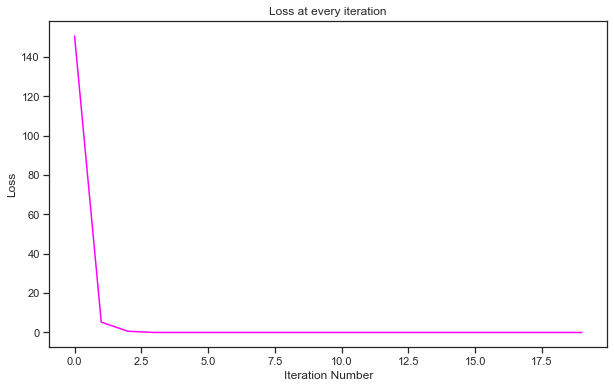

In [49]:
# Training
course_nlp = train_spacy(entity_train, 20)

# Save our trained model into a new directory

In [50]:
pickle.dump(course_nlp, open('../models/hardware_big_nlp.pkl', "wb"))

In [53]:
# Testing out the results
test_text = 'recommend similar courses to machine learning. What are some very similar courses to COURSE_NAME and courses?My iphone sucks but my macbook pro doesnt. Why couldnt they make\
            Something similar to machine learning? Or, alternatives to applied data science\
            in pyschology, are there any?? Mac. Ugh. I like geophysics but can i think about spatial geophysiscs'

def extract_hardware(user_input, visualize = False):
    # Loading it in
    hardware_nlp = pickle.load(open("../models/hardware_big_nlp.pkl", "rb"))
    doc = hardware_nlp(user_input)

    extracted_entities = []

    # These are the objects you can take out
    for ent in doc.ents:
        extracted_entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))

    # If you want to visualize
    if visualize == True:
        # Visualizing with displaCy how the document had it's entity tagged (runs a server)
        colors = {"HARDWARE": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
        options = {"ents": ["HARDWARE"], "colors": colors}
        html = displacy.render(doc, style = 'ent', options = options)
        #display(HTML(html));
        # displacy.serve(doc, style="ent", options=options)
        # displacy.serve(doc, style="ent")
    return extracted_entities

In [54]:
extract_hardware(test_text, visualize = True)

[('machine learning', 29, 45, 'CORS'),
 ('COURSE_NAME', 85, 96, 'CORS'),
 ('machine learning', 206, 222, 'CORS'),
 ('applied data', 244, 256, 'CORS'),
 ('spatial geophysiscs', 357, 376, 'CORS')]

In [55]:
extract_hardware("similar course to machine learning", visualize = True)

[('machine learning', 18, 34, 'CORS')]

In [58]:
extract_hardware("similar to geography", visualize = True)

/Users/pranjalpathak/opt/anaconda3/envs/Python_3.6/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[]